<a href="https://colab.research.google.com/github/RudyMartin/dsai-2024/blob/main/2024_project_template_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition Project Dataset

The dataset is collected by the previous code. Please save the collected data (zip file or folder) in the same directory of this code in google drive.

The dataset consists of multiple <b> 480x640x3</b> color images in 3 classes (scissors, rock and paper).


In [61]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
## Look at the current directory
%ls

'Copy of 2024_project_template_v3.ipynb'                    rps/
 df_metrics_20240610.csv                                    rps_test/
 dlutils.py                                                 rps_test.zip
 kerutils.py                                                rps.zip
 models/                                                    sequential_acc_graph.png
'NN team project presentation template for students.pptx'   sequential_loss_graph.png
 __pycache__/


In [63]:
## Change the current dire
#%cd 'gdrive/My Drive/CIFAR_Image_Recognition'
%cd '/content/gdrive/My Drive/dscamp/dscamp_public/Project Object Recognition/2024 Camp Rock Paper Scissors/Templates'

/content/gdrive/My Drive/dscamp/dscamp_public/Project Object Recognition/2024 Camp Rock Paper Scissors/Templates


# Import Data

In [57]:
#!unzip -o rps.zip # use this only when you use zip files or just skip this step

In [56]:
#!unzip -o rps_test.zip # use this only when you use zip files or just skip this step

In [64]:
"""# Import Data"""

import cv2
import glob
import numpy as np

X_scissor = np.asarray([cv2.imread(file) for file in glob.glob('rps/scissors/*.jpg')])
y_scissor = np.zeros(X_scissor.shape[0])
X_rock = np.asarray([cv2.imread(file) for file in glob.glob('rps/rock/*.jpg')])
y_rock = np.zeros(X_rock.shape[0]) + 1
X_paper = np.asarray([cv2.imread(file) for file in glob.glob('rps/paper/*.jpg')])
y_paper = np.zeros(X_paper.shape[0]) + 2

X_train = np.concatenate((X_scissor, X_rock, X_paper), axis=0)
y_train = np.concatenate((y_scissor, y_rock, y_paper), axis=0)

print(X_train.shape)
print(y_train.shape)

X_scissor = np.asarray([cv2.imread(file) for file in glob.glob('rps_test/scissors/*.jpg')])
y_scissor = np.zeros(X_scissor.shape[0])
X_rock = np.asarray([cv2.imread(file) for file in glob.glob('rps_test/rock/*.jpg')])
y_rock = np.zeros(X_rock.shape[0]) + 1
X_paper = np.asarray([cv2.imread(file) for file in glob.glob('rps_test/paper/*.jpg')])
y_paper = np.zeros(X_paper.shape[0]) + 2

X_test = np.concatenate((X_scissor, X_rock, X_paper), axis=0)
y_test = np.concatenate((y_scissor, y_rock, y_paper), axis=0)

print(X_test.shape)
print(y_test.shape)

(30, 480, 640, 3)
(30,)
(75, 480, 640, 3)
(75,)


In [11]:
# only needed when you want to take random samples of training data

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20, random_state=42)

# print(X_train.shape)
# print(X_test.shape)

# Import Packages and Global Values

In [58]:
#!pip install keras --upgrade

In [59]:
#!pip install tensorflow --upgrade

Import Packages

In [12]:
import keras
from keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD
from keras.constraints import MaxNorm
from keras.utils import to_categorical
from keras.layers import GaussianNoise, GaussianDropout, Dense, Dropout, Flatten
#from keras.layers.advanced_activations import SReLU
#from keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
import os, sys, time, datetime, fnmatch
import numpy as np
import dlutils
import kerutils
from dlutils import *
from kerutils import *


Define classes

In [13]:
nb_classes = 3
class_name = {
    0: 'scissor',
    1: 'rock',
    2: 'paper'
}

Normalize and Encode Datasets

In [ ]:
"""# Normalize Data"""
import numpy as np

seed = 7
np.random.seed(seed)

# Normalize the data
print(X_train.shape)
print(y_train.shape)

# The original data of each image is a 480x640x3 matrix of integers from 0 to 255.
# We need to scale it down to floats in the unit interval
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

# Loading Training and test data

As usual, we must convert the y_train and y_test vectors to one-hot format:<br>
0 → [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]<br>
1 → [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]<br>
2 → [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]<br>

In [83]:
# Y_train = to_categorical(y_train, nb_classes)
# Y_test = to_categorical(y_test, nb_classes)

# One hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

Let's also write two small utilities for drawing samples of images, so we can inspect our results visually.

In [84]:
def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(480,640,3)
        plt.imshow(im, cmap='gnuplot2')
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if imfile:
        plt.savefig(imfile)

Let's draw an image in X_train for example

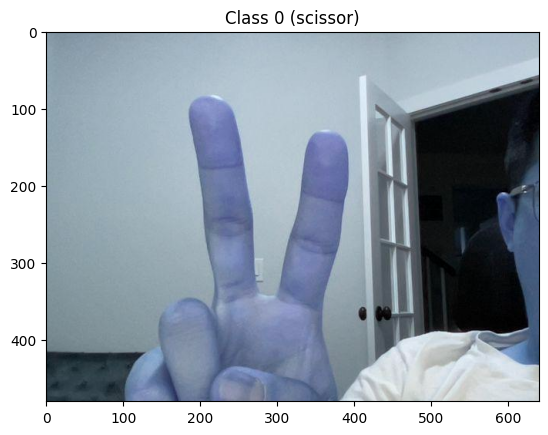

In [85]:
draw_img(0)

To test the second utility, let's draw the first 15 images in a 3x5 grid:

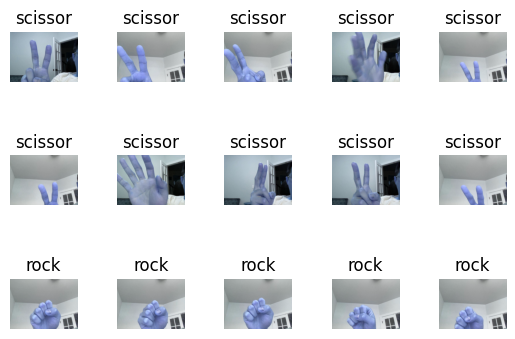

In [86]:
draw_sample(X_train, y_train, 0,3,5)

# Building Neural Network for the image set

The input layer would have to be of size 480x640x3. If we add a hidden layer with the same size, we'll end up with 9 milion synapses on the first floor. Adding one more layer of such size will take us to billions of synapses, which is of course impractical.<br>
Deep learning frameworks have come up with special types of designated layers for processing images. Each image pixel is connected to a very small subset of pixels of size 3x3 or 5x5 in its neighborhood. Intuitively, image pixels are mostly impacted by pixels around them rather than pixels in a far away region of the image.<br>
We will start with a small Keras model which combines a well thought mix of <b>Convolution2D</b>, <b>Maxpooling2D</b> and Dense layers.<br>


We will use two types of training:<br>
<b>Standard training</b>: the usual Keras fit method<br>



# Let's Train Model

Try another architecture

In [76]:
nb_epoch = 10
batch_size = 4

model1 = Sequential()
model1.add(Convolution2D(4, 2, 2, input_shape=(480, 640, 3), activation='relu')) # add parameters and activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) # add parameters
model1.add(Convolution2D(8, 2, 2, activation='relu')) # add parameters and activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) # add parameters
model1.add(Flatten())
model1.add(Dense(32, activation='relu')) # add parameters and activation function
model1.add(Dense(nb_classes, activation='softmax')) # activation function
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

print('Standard Training.')

h = model1.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    validation_data=(X_test, Y_test),
    shuffle=True
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 240, 320, 4)       52        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 120, 160, 4)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 80, 8)         136       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 40, 8)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 9600)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [78]:
# save the model if it's needed (and copy this to keep track of different versions)
# short description ->
print('Saving model1 to the file "model_10.h5"')
model1.save("models/model_10.h5")

Saving model1 to the file "model_10.h5"


In [50]:
def show_scores1(model, h, X_train, Y_train, X_test, Y_test):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print ("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print ("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    if 'val_acc' in h.history:
        print ("Over fitting score   = %.6f" % over_fitting_score(h))
        print ("Under fitting score  = %.6f" % under_fitting_score(h))
    print ("Params count:", model.count_params())
    print ("stop epoch =", max(h.epoch))
    print ("nb_epoch =", h.params['epochs'])
    #print ("batch_size =", h.params['batch_size'])
    #print ("nb_sample =", h.params['samples'])
    view_acc1(h)
    id = model.name[-1]
    plt.savefig(model.name + '_acc_graph.png')
    plt.show()
    view_loss(h)
    plt.savefig(model.name + '_loss_graph.png')
    plt.show()


In [21]:
def view_acc1(h):
    # Accuracy history graph
    plt.plot(h.history['accuracy'])
    if 'val_accuracy' in h.history:
        plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)


In [73]:
# load model if not run recently or want to revert to past model
model_file="model_10.h5"
model_dir="/content/gdrive/My Drive/dscamp/dscamp_public/Project Object Recognition/2024 Camp Rock Paper Scissors/Templates/models/"
model1 = load_model(f"{model_dir}{model_file}")

Training: accuracy   = 0.866667 loss = 0.549030
Validation: accuracy = 0.360000 loss = 25.708061
Params count: 307519
stop epoch = 9
nb_epoch = 10


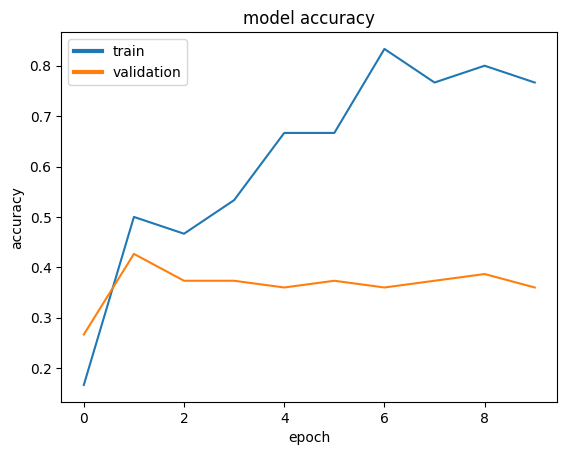

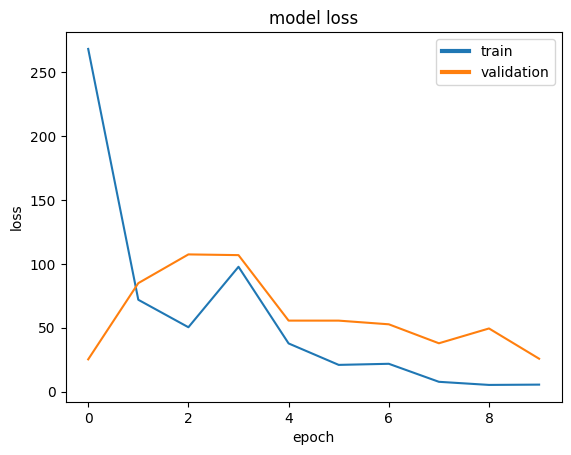

In [79]:
## print both model accuracy and model loss by epoch
show_scores1(model1, h, X_train, Y_train, X_test, Y_test)

In [80]:
loss, accuracy = model1.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))
loss, accuracy = model1.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Training: accuracy = 0.866667  ;  loss = 0.549030
Validation: accuracy1 = 0.360000  ;  loss1 = 25.708061


# Inspecting Output

Neverthelss, befor we search for a new model, let's take a quick look on some of the cases that our model1 missed. It may give us hints on the strengths an weaknesses of NN models, and what we can expect from these artificial models.<br>
The predict_classes method is helpful for getting a vector (y_pred) of the predicted classes of model1. We should compare y_pred to the expected true classes y_test in order to get the false cases:

In [87]:
import cv2
import glob
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, matthews_corrcoef, jaccard_score, precision_score, recall_score, roc_auc_score, classification_report, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model


**MAKE PREDICTIONS**: This is were the model is applied to the dataset

In [88]:
# Make predictions
predict_x = model1.predict(X_test)
y_pred = np.argmax(predict_x, axis=1)

true_preds = [(x, y, p) for (x, y, p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x, y, p) for (x, y, p) in zip(X_test, y_test, y_pred) if y != p]

print("Number of true predictions: ", len(true_preds))
print("Number of false predictions:", len(false_preds))


3/3 [==============================] - 1s 355ms/step
Number of true predictions:  27
Number of false predictions: 48


**AGGREGATE METRICS** : Use this for a quick view

In [89]:
# Convert all_preds and all_labels to numpy arrays if they are not already
all_preds = np.array(y_pred_labels)
all_labels = np.array(y_test_labels)

# Binarize the labels for ROC-AUC calculation
all_labels_binarized = label_binarize(all_labels, classes=np.unique(all_labels))
all_preds_binarized = label_binarize(all_preds, classes=np.unique(all_preds))

# Compute overall metrics
overall_accuracy = accuracy_score(all_labels, all_preds)
balanced_accuracy = balanced_accuracy_score(all_labels, all_preds)
precision_macro = precision_score(all_labels, all_preds, average='macro')
recall_macro = recall_score(all_labels, all_preds, average='macro')
f1_macro = f1_score(all_labels, all_preds, average='macro')

# Compute ROC-AUC Score (one-vs-rest approach for multi-class)
roc_auc_ovr = roc_auc_score(all_labels_binarized, all_preds_binarized, multi_class='ovr')

# Generate classification report
class_report = classification_report(all_labels, all_preds, target_names=classes)

# Print aggregate metrics
print(f'Overall Accuracy: {overall_accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_accuracy:.4f}')
print(f'Precision (Macro): {precision_macro:.4f}')
print(f'Recall (Macro): {recall_macro:.4f}')
print(f'F1 Score (Macro): {f1_macro:.4f}')
print(f'ROC-AUC Score (OvR): {roc_auc_ovr:.4f}')
print('\nClassification Report:\n', class_report)

Overall Accuracy: 0.3867
Balanced Accuracy: 0.3867
Precision (Macro): 0.5745
Recall (Macro): 0.3867
F1 Score (Macro): 0.3449
ROC-AUC Score (OvR): 0.5400

Classification Report:
               precision    recall  f1-score   support

     scissor       0.36      0.72      0.48        25
        rock       1.00      0.12      0.21        25
       paper       0.36      0.32      0.34        25

    accuracy                           0.39        75
   macro avg       0.57      0.39      0.34        75
weighted avg       0.57      0.39      0.34        75



In [90]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, matthews_corrcoef, jaccard_score
conf_matrix = confusion_matrix(y_test, y_pred)

# Define or delimit classes
nb_classes = 3
class_name = {
    0: 'scissor',
    1: 'rock',
    2: 'paper'
}
##classes = np.unique(y_test) ## these are numbers from the model data not labels
classes = np.array(list(class_name.values()))
print(classes)


# Initialize the metrics dictionary
metrics = {
    'Class': [],
    'TP': [],
    'FN': [],
    'FP': [],
    'TN': [],
    'Recall': [],
    'Precision': [],
    'Accuracy': [],
    'F1 Score': [],
    'Specificity': [],
    'MCC': [],
    'Jaccard Index': []
}

# Calculate metrics for each class
for i, class_label in enumerate(classes):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    recall = TP / (TP + FN) if TP + FN != 0 else 0
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if TP + TN + FP + FN != 0 else 0
    f1 = f1_score(y_test, y_pred, labels=[i], average=None)[0]
    specificity = TN / (TN + FP) if TN + FP != 0 else 0
    mcc = matthews_corrcoef(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, labels=[i], average=None)[0]

    metrics['Class'].append(class_label)
    metrics['TP'].append(TP)
    metrics['FN'].append(FN)
    metrics['FP'].append(FP)
    metrics['TN'].append(TN)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Specificity'].append(specificity)
    metrics['MCC'].append(mcc)
    metrics['Jaccard Index'].append(jaccard)

# Convert metrics dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Show the DataFrame with all metrics
print(df_metrics)

# Save the DataFrame to a CSV file
df_metrics.to_csv('df_metrics_20240610.csv', index=False)

['scissor' 'rock' 'paper']
     Class  TP  FN  FP  TN  Recall  Precision  Accuracy  F1 Score  \
0  scissor   7  18  12  38    0.28   0.368421      0.60  0.318182   
1     rock   6  19   8  42    0.24   0.428571      0.64  0.307692   
2    paper  14  11  28  22    0.56   0.333333      0.48  0.417910   

   Specificity       MCC  Jaccard Index  
0         0.76  0.042614       0.189189  
1         0.84  0.042614       0.181818  
2         0.44  0.042614       0.264151  


**CONFUSION MATRIX OUTPUT FOR LLM ANALYSIS** : This section creates a detailed analyis which can be submitted to a LLM for analysis

In [91]:
# Load the model
# model1 = load_model("model_1.h5")

# Define classes
class_name = {
    0: 'scissor',
    1: 'rock',
    2: 'paper'
}

# Make predictions
predict_x = model1.predict(X_test)
y_pred = np.argmax(predict_x, axis=1)

# Convert numerical labels to class names
y_test_labels = [class_name[int(y)] for y in y_test]
y_pred_labels = [class_name[int(y)] for y in y_pred]

true_preds = [(x, y, p) for (x, y, p) in zip(X_test, y_test_labels, y_pred_labels) if y == p]
false_preds = [(x, y, p) for (x, y, p) in zip(X_test, y_test_labels, y_pred_labels) if y != p]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.array(list(class_name.values()))

# Initialize the metrics dictionary
metrics = {
    'Class': [],
    'TP': [],
    'FN': [],
    'FP': [],
    'TN': [],
    'Recall': [],
    'Precision': [],
    'Accuracy': [],
    'F1 Score': [],
    'Specificity': [],
    'MCC': [],
    'Jaccard Index': []
}

# Calculate metrics for each class
for i, class_label in enumerate(classes):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    recall = TP / (TP + FN) if TP + FN != 0 else 0
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if TP + TN + FP + FN != 0 else 0
    f1 = f1_score(y_test_labels, y_pred_labels, labels=[class_label], average=None)[0]
    specificity = TN / (TN + FP) if TN + FP != 0 else 0
    mcc = matthews_corrcoef(y_test_labels, y_pred_labels)
    jaccard = jaccard_score(y_test_labels, y_pred_labels, labels=[class_label], average=None)[0]

    metrics['Class'].append(class_label)
    metrics['TP'].append(TP)
    metrics['FN'].append(FN)
    metrics['FP'].append(FP)
    metrics['TN'].append(TN)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Specificity'].append(specificity)
    metrics['MCC'].append(mcc)
    metrics['Jaccard Index'].append(jaccard)

# Convert metrics dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Show the DataFrame with all metrics
print(df_metrics)

# Save the DataFrame to a CSV file
df_metrics.to_csv('df_metrics_20240610.csv', index=False)


3/3 [==============================] - 2s 571ms/step
     Class  TP  FN  FP  TN  Recall  Precision  Accuracy  F1 Score  \
0  scissor   7  18  12  38    0.28   0.368421      0.60  0.318182   
1     rock   6  19   8  42    0.24   0.428571      0.64  0.307692   
2    paper  14  11  28  22    0.56   0.333333      0.48  0.417910   

   Specificity       MCC  Jaccard Index  
0         0.76  0.042614       0.189189  
1         0.84  0.042614       0.181818  
2         0.44  0.042614       0.264151  


**CONFUSION MATRIX** :  Contains True versus Predicted Vakues

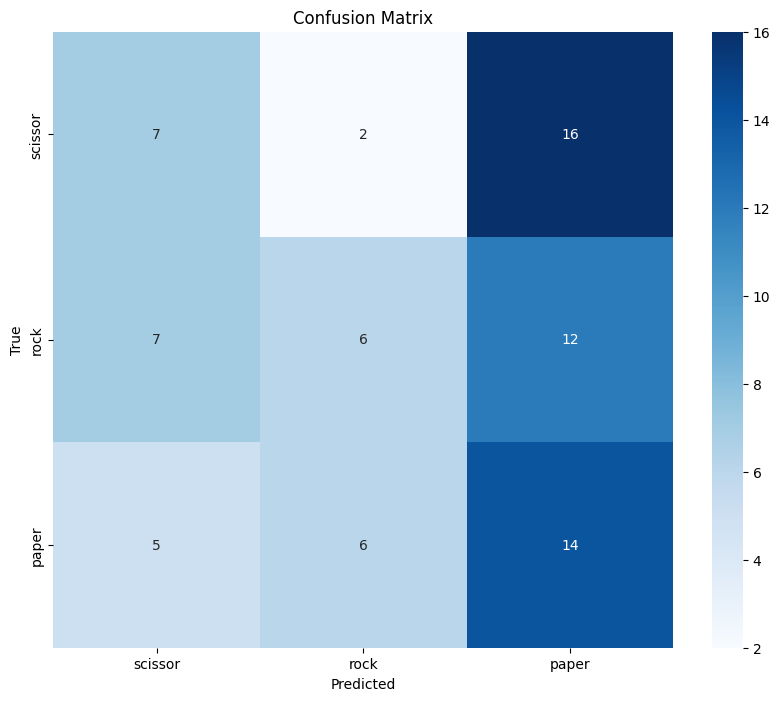

In [92]:
# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**NORMALIZED CONFUSION MATRIX** : Use this to research what types of errors are being made.

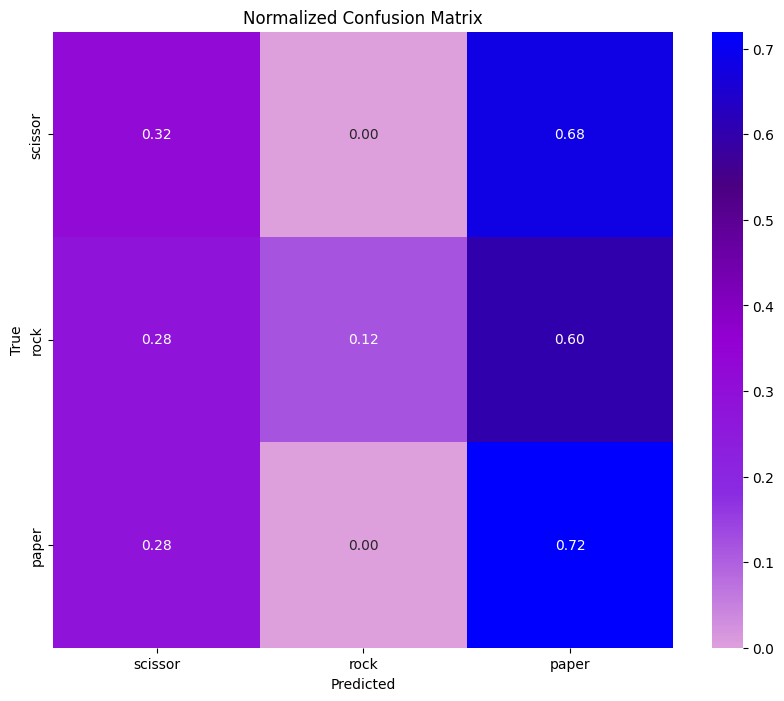

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Assuming conf_matrix and classes are already defined
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Define a custom colormap with five phases
# colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#1a9850']  # red to green spectrum
# Define a custom colormap with five phases
# colors = ['#0000ff', '#4b0082', '#9400d3', '#8a2be2', '#dda0dd']  # Blue to purple spectrum
colors = ['#dda0dd', '#8a2be2', '#9400d3', '#4b0082', '#0000ff']  # purple to Blue  spectrum
#colors = ['#d3d3d3', '#b0b0b0', '#808080', '#585858', '#404040']  # Light gray to medium gray spectrum

cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

**TRUE PREDICTION IMAGES** : Where are the images being clearly matched.

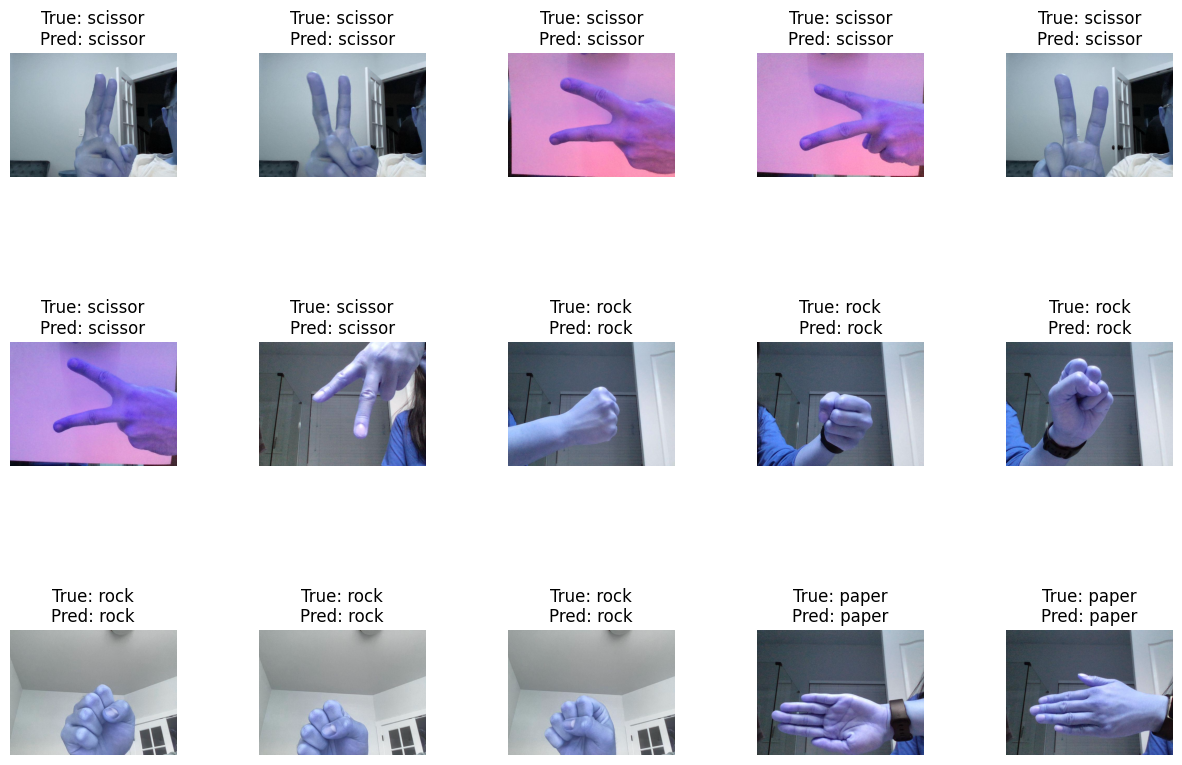

In [93]:
# Visualize true predictions
plt.figure(figsize=(15, 10))
for i, (x, y, p) in enumerate(true_preds[0:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x)
    plt.title(f"True: {y}\nPred: {p}", fontsize=12)
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


**FALSE PREDICTION IMAGES** : Let's see images we can not recognize.  These should probably be replaced.

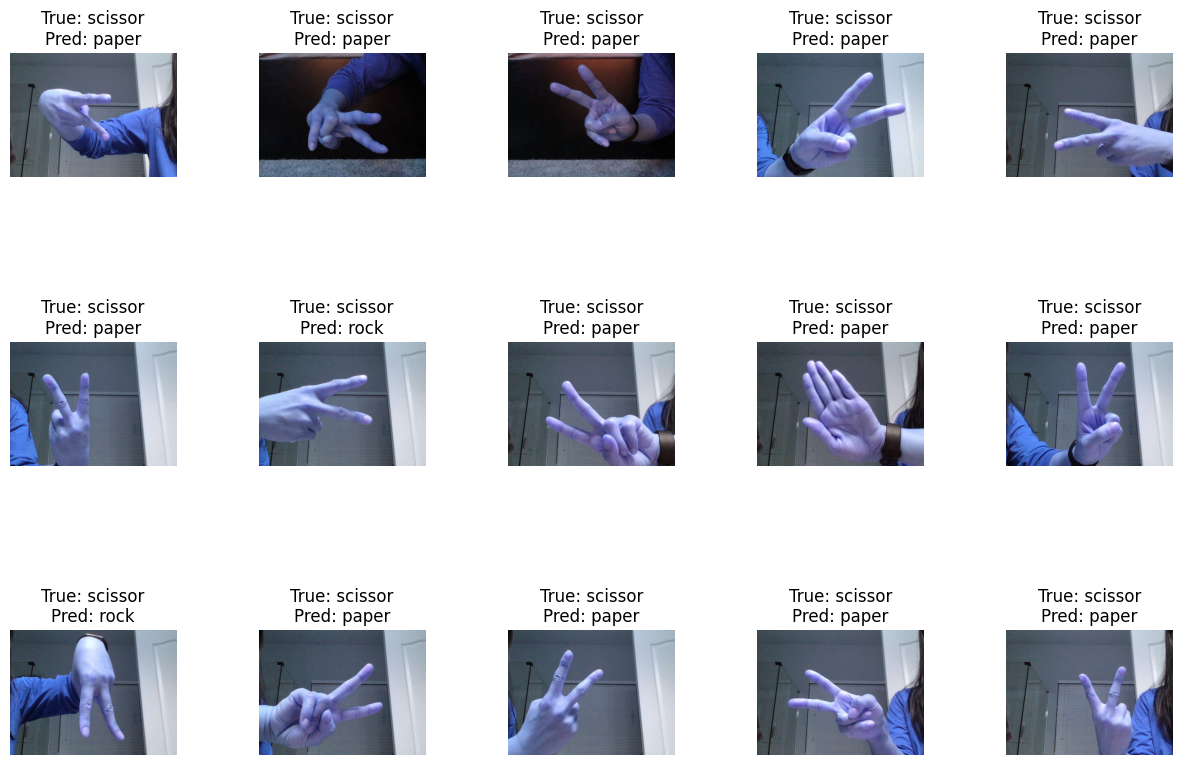

In [94]:
# Visualize false predictions
plt.figure(figsize=(15, 10))
for i, (x, y, p) in enumerate(false_preds[0:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x)
    plt.title(f"True: {y}\nPred: {p}", fontsize=12)
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
from google.colab import drive
drive.flush_and_unmount()